## Interactive ML Demos as Gifs
This notebook demonstrates how to make interactive plots using ipywidgets and save them as GIFs


### Interactive k-NN classifier

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image

iris = load_iris()
X, y = iris.data[:, :2], iris.target
print(len(iris.data))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


150


#### Plot with Slider 

In [49]:
def plot_knn(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot results
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(f'k-NN Decision Visualization (k={k})')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

slider = widgets.IntSlider(min=1, max=20, step=1, value=5, description='k')
ui = widgets.HBox([slider])
out = widgets.interactive_output(plot_knn, {'k': slider})
display(ui, out)

Output()

#### Plot and save as a GIF

In [50]:
%%capture
# Simulate widget values
frames = []
for k in range(1, 21):  # simulate slider from 1 to 20
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k')
    ax.set_title(f'k-NN Decision (k={k})')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    
    # Save frame to memory
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(image))
    
    plt.close(fig)

# Save frames as GIF
frames[0].save('knn_demo.gif', save_all=True, append_images=frames[1:], duration=300, loop=0)


![My demo](media/gif/knn_demo.gif)

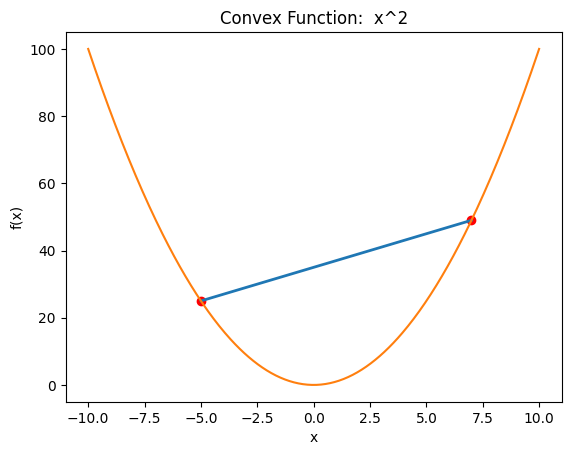

In [51]:
# Define the parabola
def f(x):
    return x**2

# Generate data for the parabola y = x^2
xs = np.linspace(-10, 10, 400)
ys = xs**2

# Choose two points on the parabola
x1, x2 = -5.0, 7.0
p1 = (x1, f(x1))
p2 = (x2, f(x2))

plt.figure()
# Plot the two points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Draw the line segment connecting them
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2)

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Convex Function:  x^2")
plt.show()

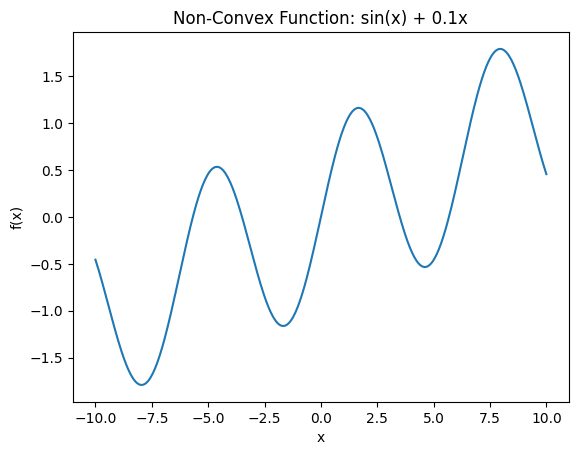

In [52]:
# Non-convex function: f(x) = sin(x) + 0.1x
x = np.linspace(-10, 10, 400)
y = np.sin(x) + 0.1 * x

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: sin(x) + 0.1x")
plt.show()

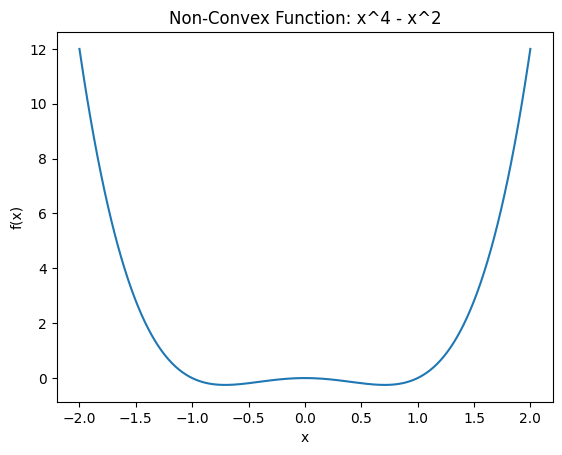

In [53]:
# Non-convex function: f(x) = x^4 - x^2
x = np.linspace(-2, 2, 400)
y = x**4 - x**2

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: x^4 - x^2")
plt.show()


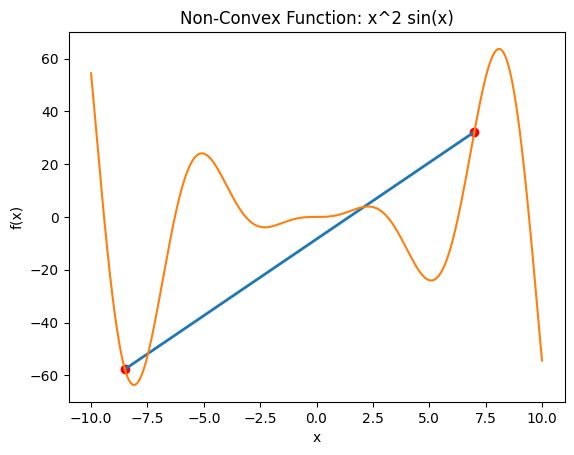

In [54]:
# Define the fn
def f(x):
    return x**2 * np.sin(x)

# Non-convex function: f(x) = x^2 * sin(x)
xs = np.linspace(-10, 10, 600)
ys = xs**2 * np.sin(xs)

# Choose two points on the fn
x1, x2 = -8.5, 7.0
p1 = (x1, f(x1))
p2 = (x2, f(x2))

plt.figure()
# Plot the two points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Draw the line segment connecting them
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2)

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: x^2 sin(x)")
plt.show()

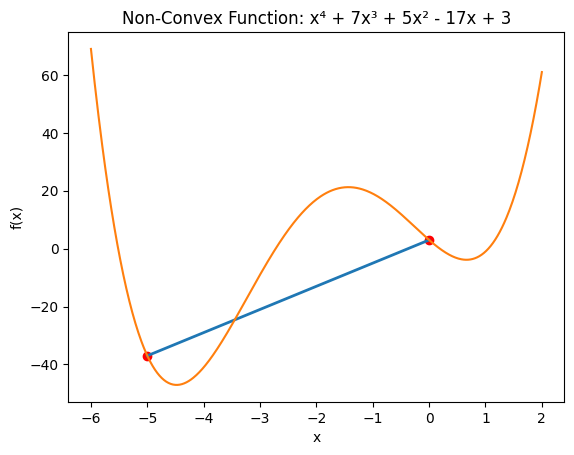

In [55]:
# Define the fn
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3


xs = np.linspace(-6, 2, 600)
ys = xs**4 + 7*xs**3 + 5*xs**2 - 17*xs + 3

# Choose two points on the fn
x1, x2 = -5, 0
p1 = (x1, f(x1))
p2 = (x2, f(x2))

plt.figure()
# Plot the two points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Draw the line segment connecting them
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2)

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: x⁴ + 7x³ + 5x² - 17x + 3")
plt.show()

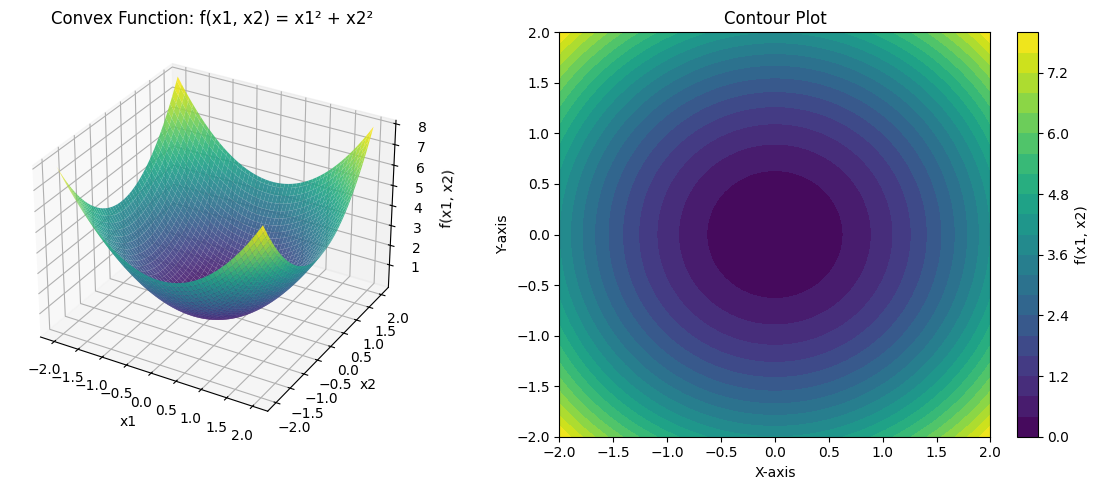

In [56]:
from mpl_toolkits.mplot3d import Axes3D
# Create a grid of (x1, x2) values
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Define the convex function
Z = X1**2 + X2**2

# Set up the figure
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface
surf = ax1.plot_surface(X1, X2, Z, alpha=0.9, cmap='viridis')

# Labels
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('Convex Function: f(x1, x2) = x1² + x2²')

# Plot on the second subplot (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=20, cmap='viridis')
fig.colorbar(contour, ax=ax2, label='f(x1, x2)')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')


# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plots
plt.show()

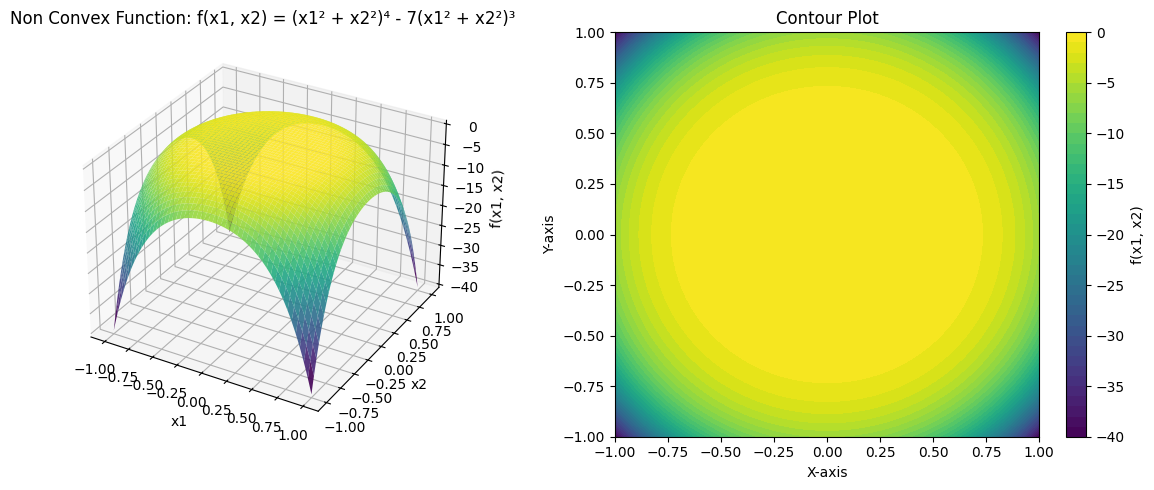

In [81]:
# Create a grid of (x1, x2) values
x1 = np.linspace(-1, 1, 500)
x2 = np.linspace(-1, 1, 500)
X1, X2 = np.meshgrid(x1, x2)

# Define the non-convex function
Z = (X1**2 + X2**2)**4 - 7*(X1**2 + X2**2)**3 #+ 13*(X1**2 + X2**2)**2
# Z = np.sin(X1**2 + X2**2)  # Non-convex

# Set up the figure
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface
surf = ax1.plot_surface(X1, X2, Z, alpha=0.9, cmap='viridis')


# Labels
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('Non Convex Function: f(x1, x2) = (x1² + x2²)⁴ - 7(x1² + x2²)³')# + 13(x1² + x2²)²')

# Define contour levels spanning the full range
levels = np.linspace(Z.min(), Z.max(), 100)

# Plot on the second subplot (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=40, cmap='viridis')
fig.colorbar(contour, ax=ax2, label='f(x1, x2)')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')


# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plots
plt.show()

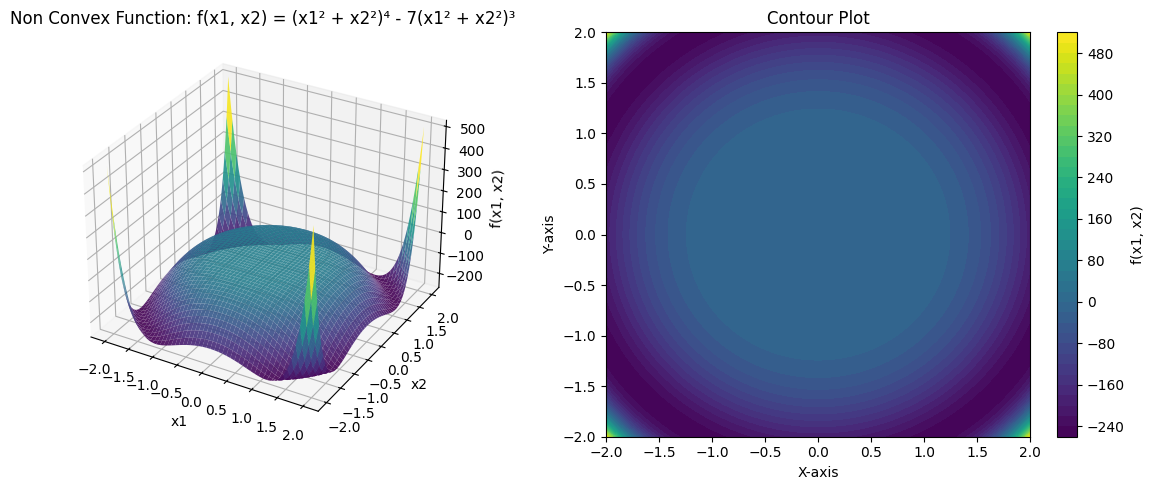

In [82]:
# Create a grid of (x1, x2) values
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-2, 2, 500)
X1, X2 = np.meshgrid(x1, x2)

# Define the non-convex function
Z = (X1**2 + X2**2)**4 - 7*(X1**2 + X2**2)**3 #+ 13*(X1**2 + X2**2)**2
# Z = np.sin(X1**2 + X2**2)  # Non-convex

# Set up the figure
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface
surf = ax1.plot_surface(X1, X2, Z, alpha=0.9, cmap='viridis')


# Labels
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('Non Convex Function: f(x1, x2) = (x1² + x2²)⁴ - 7(x1² + x2²)³')# + 13(x1² + x2²)²')

# Define contour levels spanning the full range
levels = np.linspace(Z.min(), Z.max(), 100)

# Plot on the second subplot (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=40, cmap='viridis')
fig.colorbar(contour, ax=ax2, label='f(x1, x2)')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')


# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plots
plt.show()

#### Demos

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# -------------------------------------
# Define the function and derivatives
# -------------------------------------
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

def f_prime(x):
    return 4*x**3 + 21*x**2 + 10*x - 17

def f_double_prime(x):
    return 12*x**2 + 42*x + 10

# -------------------------------------
# Compute local minima & maxima from f'(x)=0
# -------------------------------------
coeffs = [4, 21, 10, -17]  # 4x^3 + 21x^2 + 10x -17
roots = np.roots(coeffs)
critical_pts = np.real(roots[np.isreal(roots)])
critical_pts.sort()

# Label minima/maxima correctly
labels = []
for x0 in critical_pts:
    if f_double_prime(x0) > 0:
        labels.append("local minimum")
    else:
        labels.append("local maximum")

# Dropdown menu options for selecting the extremum
extrema_options = {
    f"{label} at x={x0:.4f}": x0
    for label, x0 in zip(labels, critical_pts)
}

# Color options for highlighting the curve
color_options = {
    "red": "red",
    "blue": "blue",
    "green": "green",
    "orange": "orange",
    "purple": "purple"
}

# -------------------------------------
# Plotting function
# -------------------------------------
def plot_extremum(x0, highlight_color):
    X = np.linspace(-6, 3, 600)
    Y = f(X)

    y0 = f(x0)
    slope = f_prime(x0)

    # Tangent line exactly at x0
    x_tan = np.linspace(x0 - 1, x0 + 1, 300)
    y_tan = y0 + slope * (x_tan - x0)

    # Shaded curve region around extremum
    x_local = np.linspace(x0 - 0.8, x0 + 0.8, 400)
    y_local = f(x_local)

    plt.figure(figsize=(9,6))

    # Plot the whole function in base color
    plt.plot(X, Y, color="black", alpha=0.6, label="f(x)")

    # Highlight the curve near the extremum (colored line)
    plt.plot(x_local, y_local, linewidth=3, color=highlight_color,
             label=f"curvature")

    # Tangent line (dashed)
    plt.plot(x_tan, y_tan, linestyle="--", linewidth=2, label="tangent line")

    # Mark the extremum
    plt.scatter([x0], [y0], s=90, color="red", zorder=5)

    plt.title(f"Local Optimum at x = {x0:.4f}   (f(x0) = {y0:.4f})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()


# -------------------------------------
# Interactive widget
# -------------------------------------
interact(
    plot_extremum,
    x0=extrema_options,
    highlight_color=color_options
)


interactive(children=(Dropdown(description='x0', options={'local minimum at x=-4.4803': -4.480268480373647, 'l…

<function __main__.plot_extremum(x0, highlight_color)>

Critical points: [-4.48026848 -1.4321124   0.66238088]
GIF saved: local_optima_animation.gif


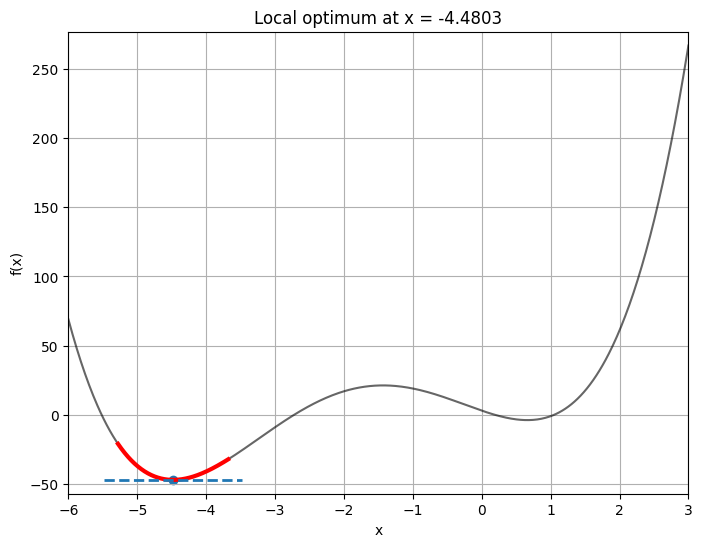

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ---------------------------------------
# Define function and derivative
# ---------------------------------------
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

def f_prime(x):
    return 4*x**3 + 21*x**2 + 10*x - 17


# ---------------------------------------
# Compute the correct local minima/maxima
# ---------------------------------------
# Solve f'(x) = 0 for real roots
coeffs = [4, 21, 10, -17]
roots = np.roots(coeffs)
critical_points = np.real(roots[np.isreal(roots)])
critical_points.sort()

print("Critical points:", critical_points)

# ---------------------------------------
# Set up plotting grid
# ---------------------------------------
X = np.linspace(-6, 3, 600)
Y = f(X)

# ---------------------------------------
# Set up figure
# ---------------------------------------
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, color="black", alpha=0.6, label="f(x)")
ax.set_xlim(-6, 3)
ax.set_ylim(min(Y)-10, max(Y)+10)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)

# Lines that will update
highlight_line, = ax.plot([], [], linewidth=3, color="red")
tangent_line, = ax.plot([], [], linestyle="--", linewidth=2)
point_scatter = ax.scatter([], [])


# ---------------------------------------
# Animation update function
# ---------------------------------------
def update(frame):
    x0 = critical_points[frame]
    y0 = f(x0)
    slope = f_prime(x0)

    # Highlight region around optimum
    x_local = np.linspace(x0 - 0.8, x0 + 0.8, 200)
    y_local = f(x_local)
    highlight_line.set_data(x_local, y_local)

    # Tangent line
    x_tan = np.linspace(x0 - 1, x0 + 1, 200)
    y_tan = y0 + slope * (x_tan - x0)
    tangent_line.set_data(x_tan, y_tan)

    # Point marker
    point_scatter.set_offsets([[x0, y0]])

    # Title
    ax.set_title(f"Local optimum at x = {x0:.4f}")

    return highlight_line, tangent_line, point_scatter


# ---------------------------------------
# Create animation
# ---------------------------------------
anim = FuncAnimation(
    fig,
    update,
    frames=len(critical_points),
    interval=1500,
    blit=False
)

# ---------------------------------------
# Save GIF
# ---------------------------------------
gif_path = "local_optima_animation.gif"
anim.save(gif_path, writer=PillowWriter(fps=1))

print("GIF saved:", gif_path)


![My demo](media/gif/local_optima_animation.gif)

### Gradient Descent Demo

In [ ]:
# --- make sure widgets and plotting work in THIS notebook ---
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection
import ipywidgets as widgets
from ipywidgets import interact

# ----- cost + gradient -----
def cost_function(x):
    return x[0]**2 + x[1]**2

def gradient_cost_function(x):
    return np.array([2*x[0], 2*x[1]])

# ----- precompute surface -----
x1 = np.linspace(-1.0, 1.0, 100)
x2 = np.linspace(-1.0, 1.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = cost_function((X1, X2))

def compute_trajectory(x0, y0, eta, nb_steps):
    """Return array of shape (nb_steps+1, 3): [x, y, f(x,y)]."""
    x = np.array([x0, y0], dtype=float)
    traj = np.empty((nb_steps + 1, 3))
    traj[0] = [x[0], x[1], cost_function(x)]
    for t in range(1, nb_steps + 1):
        grad = gradient_cost_function(x)
        x = x - eta * grad
        traj[t] = [x[0], x[1], cost_function(x)]
    return traj

def plot_gradient_descent(x0=0.8, y0=0.8, eta=0.1, steps=10):
    steps = int(steps)
    if steps < 1:
        steps = 1

    traj = compute_trajectory(x0, y0, eta, steps)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # surface: brighter colormap
    surf = ax.plot_surface(
        X1, X2, Z,
        cmap=cm.plasma,
        linewidth=0,
        antialiased=True,
        alpha=0.85
    )

    # gradient descent path
    ax.plot(
        traj[:, 0], traj[:, 1], traj[:, 2],
        color='black',
        marker='o',
        markersize=6,
        linewidth=2,
        label='GD path'
    )

    # start / end markers
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2],
               color='lime', s=80, marker='o', label='start')
    ax.scatter(traj[-1, 0], traj[-1, 1], traj[-1, 2],
               color='red', s=80, marker='*', label='end')

    ax.set_xlabel('$x_1$', labelpad=8)
    ax.set_ylabel('$x_2$', labelpad=8)
    ax.set_zlabel('$f(x_1, x_2)$', labelpad=8)
    ax.set_title('Gradient Descent on $f(x_1, x_2) = x_1^2 + x_2^2$', pad=14)

    ax.view_init(elev=30, azim=-135)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 2)

    ax.legend(loc='upper left')
    fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, pad=0.1, label='$f(x_1,x_2)$')

    plt.show()

# ----- interactive widgets -----
interact(
    plot_gradient_descent,
    x0=widgets.FloatSlider(value=0.8, min=-1.0, max=1.0, step=0.05, description='x₁ start'),
    y0=widgets.FloatSlider(value=0.8, min=-1.0, max=1.0, step=0.05, description='x₂ start'),
    eta=widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='η (step size)'),
    steps=widgets.IntSlider(value=10, min=1, max=30, step=1, description='steps')
);


'media/gif/gd_fixed_0.10.gif'

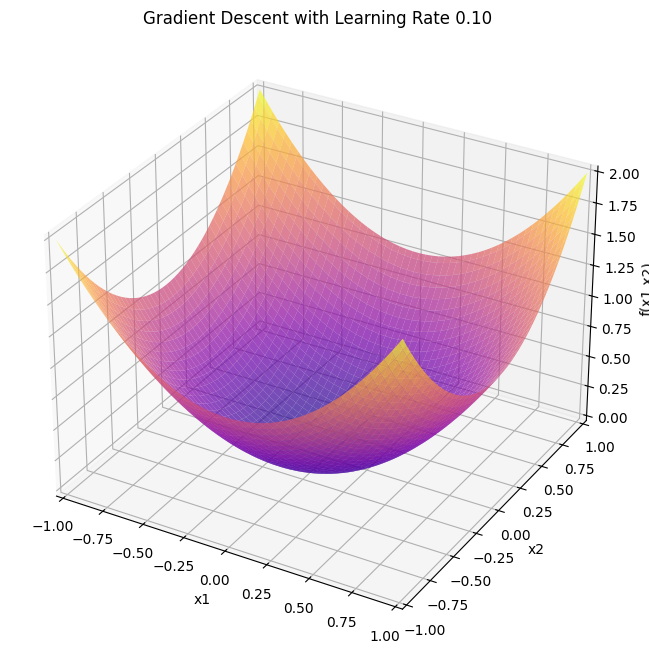

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# ---- Cost function and gradient ----
def cost_function(x1, x2):
    return x1**2 + x2**2

def gradient(x):
    return np.array([2*x[0], 2*x[1]])

# ---- Parameters ----
nb_steps = 20
x0 = np.array([0.8, 0.8])
learning_rate = 0.1

# ---- Generate GD trajectory ----
def gen_trajectory():
    x = x0.copy()
    data = np.zeros((3, nb_steps+1))
    data[:, 0] = [x[0], x[1], cost_function(x[0], x[1])]

    for t in range(1, nb_steps+1):
        grad = gradient(x)
        x = x - learning_rate * grad
        data[:, t] = [x[0], x[1], cost_function(x[0], x[1])]

    return data

trajectory = gen_trajectory()

# ---- Plot setup ----
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface grid
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = cost_function(X, Y)

# Draw surface
ax.plot_surface(X, Y, Z, cmap=cm.plasma, rstride=2, cstride=2, alpha=0.7, linewidth=0)

# Starting point line object
line = ax.plot([trajectory[0,0]], [trajectory[1,0]], [trajectory[2,0]],color='black',
               marker='o', markersize=6, linewidth=2)[0]

# Axes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 2])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')
ax.set_title(f"Gradient Descent with Learning Rate {learning_rate:.2f}")
ax.view_init(30, -60)

# ---- Frame update ----
def update_frame(i):
    line.set_data(trajectory[0, :i], trajectory[1, :i])
    line.set_3d_properties(trajectory[2, :i])
    return line

# ---- Build Animation ----
anim = animation.FuncAnimation(fig, update_frame, nb_steps+1, interval=200)
filename = f"gd_fixed_{learning_rate:.2f}.gif"
# Save GIF
gif_path = "media/gif/"+filename
anim.save(gif_path, writer='pillow', dpi=80)

gif_path


In [62]:
trajectory

array([[8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [1.28000000e+00, 8.19200000e-01, 5.24288000e-01, 3.35544320e-01,
        2.14748365e-01, 1.37438953e-01, 8.79609302e-02, 5.62949953e-02,
        3.60287970e-02, 2.30584301e-02, 1.47573953e-02, 9.44473297e-03,
        6.0446

![My demo](media/gif/gd_fixed_0.10.gif)

/var/folders/hp/tk82gyb554bbrfrngwy7c6rw0000gn/T/ipykernel_89888/2695455013.py:45: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(xs[frame], ys[frame])
/var/folders/hp/tk82gyb554bbrfrngwy7c6rw0000gn/T/ipykernel_89888/2695455013.py:45: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(xs[frame], ys[frame])


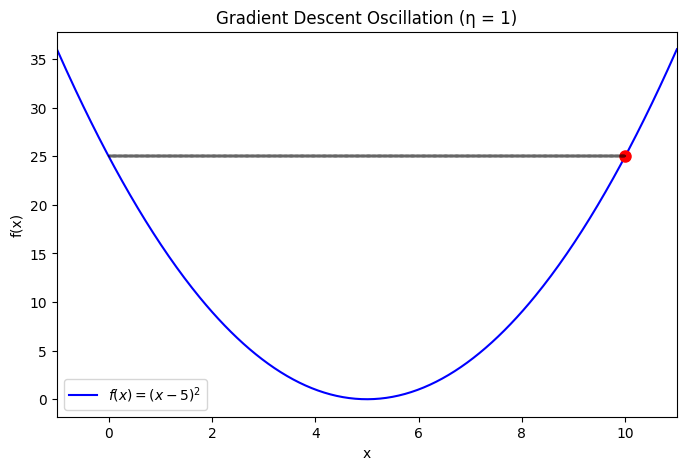

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---- function + gradient ----
def f(x):
    return (x - 5)**2

def grad_f(x):
    return 2*(x - 5)

# ---- parameters ----
x0 = 10
eta = 1.0                # step size (too large → oscillation)
num_steps = 20

# ---- compute trajectory ----
xs = [x0]
for _ in range(num_steps):
    x_new = xs[-1] - eta * grad_f(xs[-1])
    xs.append(x_new)

xs = np.array(xs)
ys = f(xs)

# ---- set up plot ----
xline = np.linspace(-1, 11, 400)
yline = f(xline)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xline, yline, 'b-', label='$f(x) = (x-5)^2$')
point, = ax.plot([], [], 'ro', markersize=8)
trace, = ax.plot([], [], 'k--', alpha=0.6)

ax.set_title("Gradient Descent Oscillation (η = 1)")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim(-1, 11)
# ax.set_ylim(0, 30)
ax.legend()

# ---- animation update ----
def update(frame):
    # current point
    point.set_data(xs[frame], ys[frame])
    # trace
    trace.set_data(xs[:frame+1], ys[:frame+1])
    return point, trace

ani = animation.FuncAnimation(
    fig, update, frames=len(xs), interval=500, blit=True
)

# Save a GIF
ani.save('media/gif/gd_oscillation.gif', writer='pillow', dpi=80)

plt.show()


![Test demo](media/gif/gd_oscillation.gif)

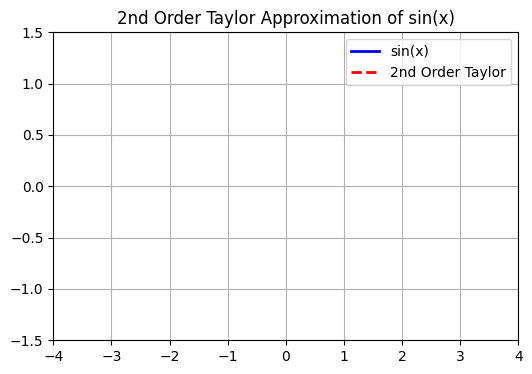

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- Function and Taylor approximation ---
def f(x):
    return np.sin(x)

def taylor2(x):
    return x - x**3 / 6   # 2nd order around 0

# --- Data ---
x = np.linspace(-4, 4, 300)
y_true = f(x)
y_t2 = taylor2(x)

# Reduce frame count for faster GIF generation
frames = 120

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-4, 4)
ax.set_ylim(-1.5, 1.5)
ax.set_title("2nd Order Taylor Approximation of sin(x)")
ax.grid(True)

line_true, = ax.plot([], [], 'b', linewidth=2, label="sin(x)")
line_t2,   = ax.plot([], [], 'r--', linewidth=2, label="2nd Order Taylor")
ax.legend()

# --- Animation ---
def init():
    line_true.set_data([], [])
    line_t2.set_data([], [])
    return line_true, line_t2

def update(frame):
    n = int((frame / frames) * len(x))
    line_true.set_data(x[:n], y_true[:n])
    line_t2.set_data(x[:n], y_t2[:n])
    return line_true, line_t2

ani = FuncAnimation(fig, update, frames=frames, init_func=init, interval=40)

gif_path = "media/gif/taylor_sin_N2.gif"
ani.save(gif_path, dpi=90, writer=PillowWriter())

![My demo](media/gif/taylor_sin_N2.gif)

#### Newton's Method

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
from matplotlib import cm

# Function, gradient, Hessian
def f(x):
    return x[0]**2 + x[1]**2

def grad(x):
    return np.array([2*x[0], 2*x[1]])

def hessian(x):
    return np.array([[2, 0],
                     [0, 2]])

def newton_step(x):
    H = hessian(x)
    g = grad(x)
    return x - np.linalg.inv(H) @ g # np.linalg.solve(H, g)  # Newton update: x_{k+1} = x - H^{-1} g

# Create surface mesh
X = np.linspace(-1, 1, 200)
Y = np.linspace(-1, 1, 200)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

# Visualization function
def plot_newton(x0_1, x0_2):
    x = np.array([x0_1, x0_2])
    trajectory = [x]

    # Newton iteration (only 1 step needed here, but let's do several)
    for _ in range(5):
        x = newton_step(x)
        trajectory.append(x)

    trajectory = np.array(trajectory)

    # Plot the 3D surface and trajectory
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(XX, YY, ZZ, cmap=cm.plasma, alpha=0.7, edgecolor='none')
    
    # Trajectory line
    ax.plot(trajectory[:,0], trajectory[:,1], [f(p) for p in trajectory], 
            '-o', color='red', markersize=5, label="Newton Path")

    # Labeling
    ax.set_title("Newton's Method on f(x1,x2)=x1²+x2²", fontsize=14)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x)")

    ax.legend()
    plt.show()

# Widget
interact(
    plot_newton,
    x0_1=FloatSlider(value=2.0, min=-4, max=4, step=0.1, description="x1 start"),
    x0_2=FloatSlider(value=2.0, min=-4, max=4, step=0.1, description="x2 start"),
);


interactive(children=(FloatSlider(value=2.0, description='x1 start', max=4.0, min=-4.0), FloatSlider(value=2.0…

Saved GIF: media/gif/newton.gif


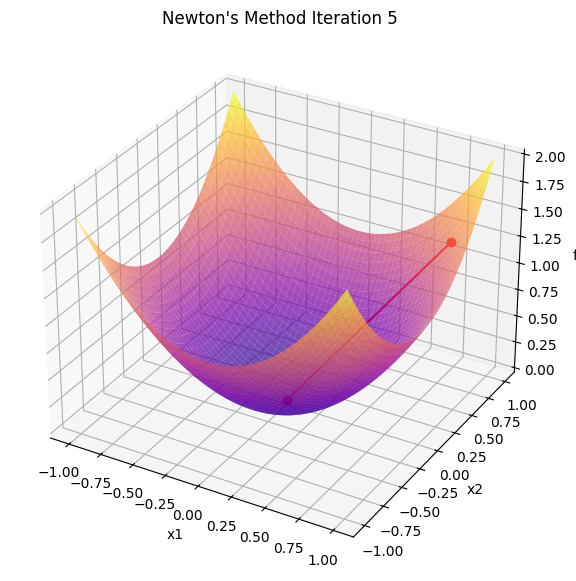

In [87]:
import matplotlib.animation as animation

def animate_newton(x0_1, x0_2, filename):
    x = np.array([x0_1, x0_2])
    trajectory = [x]

    for _ in range(5):
        x = newton_step(x)
        trajectory.append(x)
    trajectory = np.array(trajectory)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    def update(i):
        ax.clear()
        ax.plot_surface(XX, YY, ZZ, cmap=cm.plasma, alpha=0.7, edgecolor='none')
        ax.plot(trajectory[:i,0], trajectory[:i,1], [f(p) for p in trajectory[:i]], 
                '-o', color='red', markersize=6)
        ax.set_title("Newton's Method Iteration {}".format(i))
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("f")
        return ax

    anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=800)
    anim.save(filename, writer='pillow')

    print(f"Saved GIF: {filename}")

# Example usage:
animate_newton(0.8, 0.8, "media/gif/newton.gif")


In [88]:
trajectory

array([[8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [1.28000000e+00, 8.19200000e-01, 5.24288000e-01, 3.35544320e-01,
        2.14748365e-01, 1.37438953e-01, 8.79609302e-02, 5.62949953e-02,
        3.60287970e-02, 2.30584301e-02, 1.47573953e-02, 9.44473297e-03,
        6.0446

![My demo](media/gif/newton.gif)

In [98]:
# ============================================================
#  Logistic Regression Optimization Case Study
#  Dataset: UCI Breast Cancer Diagnostic
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------
# Load and preprocess data
# -----------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1,1)
print(X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Add bias term
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test  = np.hstack([np.ones((X_test.shape[0],1)), X_test])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

(569, 30)
Train shape: (455, 31)
Test shape: (114, 31)


In [102]:
# -----------------------
# Logistic Regression Ops
# -----------------------
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_loss(w, X, y):
    z = np.dot(X, w)
    p = sigmoid(z)
    eps = 1e-10
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

def grad_logistic(w, X, y):
    z = np.dot(X, w)
    p = sigmoid(z)
    return X.T @ (p - y) / len(y)

def hessian_logistic(w, X, y):
    z = np.dot(X, w)
    p = sigmoid(z)
    D = np.diag((p*(1-p)).flatten())
    return X.T @ D @ X / len(y)

# -----------------------
# Optimization Algorithms
# -----------------------

# Batch Gradient Descent
def gradient_descent(w0, X, y, lr=0.1, iters=200):
    w = w0.copy()
    losses = []
    for _ in range(iters):
        g = grad_logistic(w, X, y)
        w -= lr*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# SGD
def sgd(w0, X, y, lr=0.1, iters=200):
    w = w0.copy()
    losses = []
    n = len(y)
    for _ in range(iters):
        i = np.random.randint(n)
        g = grad_logistic(w, X[i:i+1], y[i:i+1])
        w -= lr*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# Mini-batch GD
def mbgd(w0, X, y, lr=0.1, iters=200, batch_size=32):
    w = w0.copy()
    losses = []
    n = len(y)
    for _ in range(iters):
        idx = np.random.choice(n, batch_size, replace=False)
        for i in range(0, n, batch_size):
            Xb, yb = X[i:i+batch_size], y[i:i+batch_size]
            g = grad_logistic(w, Xb, yb)
            w -= lr*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# AdaGrad
def adagrad(w0, X, y, lr=0.5, iters=200, eps=1e-8):
    w = w0.copy()
    G = np.zeros_like(w)
    losses = []
    for _ in range(iters):
        g = grad_logistic(w, X, y)
        G += g*g
        w -= (lr/(np.sqrt(G) + eps))*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# Newton’s Method
def newton_method(w0, X, y, iters=10, damping=1e-3):
    w = w0.copy()
    losses = []
    for _ in range(iters):
        g = grad_logistic(w, X, y)
        H = hessian_logistic(w, X, y)
        H_reg = H + damping*np.eye(len(w))
        step = np.linalg.inv(H_reg) @ g
        w -= step
        losses.append(logistic_loss(w, X, y))
    return w, losses

# -----------------------
# Run Experiments
# -----------------------
d = X_train.shape[1]
w0 = np.zeros((d,1))

w_gd, L_gd = gradient_descent(w0, X_train, y_train)
w_sgd, L_sgd = sgd(w0, X_train, y_train)
w_mb, L_mb = mbgd(w0, X_train, y_train)
w_ag, L_ag = adagrad(w0, X_train, y_train)
w_nt, L_nt = newton_method(w0, X_train, y_train)

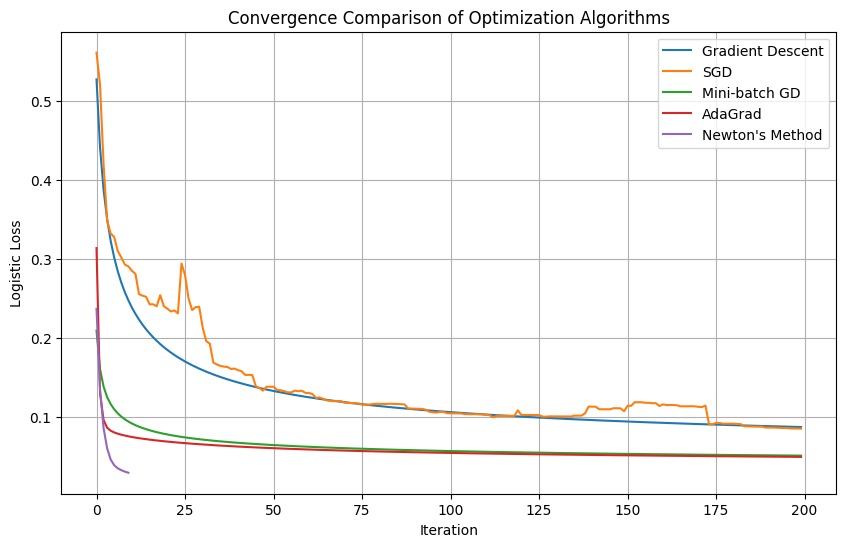

In [103]:
# -----------------------
# Plot Loss Curves
# -----------------------
plt.figure(figsize=(10,6))
plt.plot(L_gd, label="Gradient Descent")
plt.plot(L_sgd, label="SGD")
plt.plot(L_mb, label="Mini-batch GD")
plt.plot(L_ag, label="AdaGrad")
plt.plot(L_nt, label="Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.title("Convergence Comparison of Optimization Algorithms")
plt.legend()
plt.grid(True)
plt.show()

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score
# -----------------------
# Accuracy Evaluation
# -----------------------
def performance(w, X, y):
    preds = (sigmoid(np.dot(X, w)) >= 0.5).astype(int)
    return np.mean(preds == y), f1_score(y, preds)

print("Train Accuracy & F1 Score:")
print("- GD:", performance(w_gd, X_train, y_train))
print("- SGD:", performance(w_sgd, X_train, y_train))
print("- MBGD:", performance(w_mb, X_train, y_train))
print("- AdaGrad:", performance(w_ag, X_train, y_train))
print("- Newton:", performance(w_nt, X_train, y_train))

print("\nTest Accuracy & F1 Score:")
print("- GD:", performance(w_gd, X_test, y_test))
print("- SGD:", performance(w_sgd, X_test, y_test))
print("- MBGD:", performance(w_mb, X_test, y_test))
print("- AdaGrad:", performance(w_ag, X_test, y_test))
print("- Newton:", performance(w_nt, X_test, y_test))

Train Accuracy & F1 Score:
- GD: (0.9824175824175824, 0.9861111111111112)
- SGD: (0.9758241758241758, 0.9809358752166378)
- MBGD: (0.9868131868131869, 0.9895470383275261)
- AdaGrad: (0.9868131868131869, 0.9895470383275261)
- Newton: (0.989010989010989, 0.9912739965095986)

Test Accuracy & F1 Score:
- GD: (0.9912280701754386, 0.993006993006993)
- SGD: (0.9736842105263158, 0.9790209790209791)
- MBGD: (0.9824561403508771, 0.9859154929577465)
- AdaGrad: (0.9824561403508771, 0.9859154929577465)
- Newton: (0.9649122807017544, 0.9714285714285714)
